<a href="https://colab.research.google.com/github/Inuri92/CapstoneProject/blob/main/Capstoneproject_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model to Predict Maternal Health Risk

*   Age: Age of pregnant woman in years
*   SystolicBP: Upper value of Blood Pressure in mmHg
*   DiastolicBP: Lower value of Blood Pressure in mmHg
*   BS: Blood glucose levels in mmol/L
*   HeartRate: A normal resting heart rate in beats per minute
*   BodyTemp: Body temperature in F
*   RiskLevel: Risk Intensity Level during pregnancy



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data

In [ ]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1014.0,NaN,NaN,NaN,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,NaN,NaN,NaN,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,NaN,NaN,NaN,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,NaN,NaN,NaN,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,NaN,NaN,NaN,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,NaN,NaN,NaN,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0
RiskLevel,1014,3,low risk,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


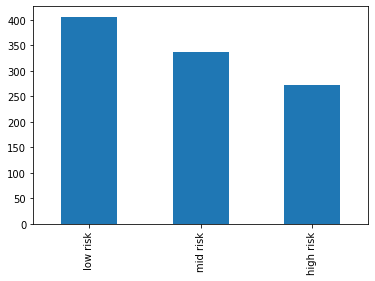

In [ ]:
data['RiskLevel'].value_counts().plot(kind='bar')

# Data Pre-processing

In [ ]:
# Check duplicates
duplicates = data[data.duplicated()]
duplicates

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


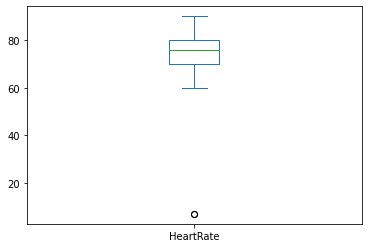

In [ ]:
data['HeartRate'].plot(kind='box')

In [ ]:
#Calculate Upper & Lower bound
q3 = np.quantile(data['HeartRate'], 0.75)
q1 = np.quantile(data['HeartRate'], 0.25)
IQR = q3-q1
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
data.loc[(data['HeartRate']<= lower_limit) | (data['HeartRate']>= upper_limit)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [ ]:
data.drop(data[(data['HeartRate']<= lower_limit) | (data['HeartRate']>= upper_limit)].index, inplace = True)

In [ ]:
data['RiskLevel'].value_counts()

low risk     404
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
# Assign numbers to class labels
data['y_act'] = data['RiskLevel']
data['y_act'].replace('low risk', 0, inplace=True)
data['y_act'].replace('mid risk', 1, inplace=True)
data['y_act'].replace('high risk', 2, inplace=True)

data.sample(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,y_act
922,17,85,60,7.5,102.0,86,low risk,0
718,31,120,60,6.1,98.0,76,mid risk,1
910,17,70,50,7.9,98.0,70,low risk,0
261,19,120,75,6.9,98.0,66,low risk,0
62,12,95,60,7.2,98.0,77,low risk,0


#Save Processed File

In [ ]:
# Save as .csv
data.to_csv('data_processed.csv', index=False)